# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [52]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)
%matplotlib inline

In [54]:
#確認總共多少個Test跟Feature
print(X.shape)
print(y.shape)

(537, 64)
(537,)


In [55]:
#設定模型預計參數
#PCA中的n_components表示要留下多少特徵
pca = decomposition.PCA(n_components=3)

In [56]:
#建模
pca.fit(X)
##explained_variance_ratio_ :
#Percentage of variance explained by each of the selected components.
##singular_values_ :
#The singular values corresponding to each of the selected components.
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 
X = pca.transform(X)
#新的特徵矩陣
print(X.shape)

[0.31488779 0.18556129 0.10654207]
[442.57365615 339.74364575 257.4353649 ]
(537, 3)


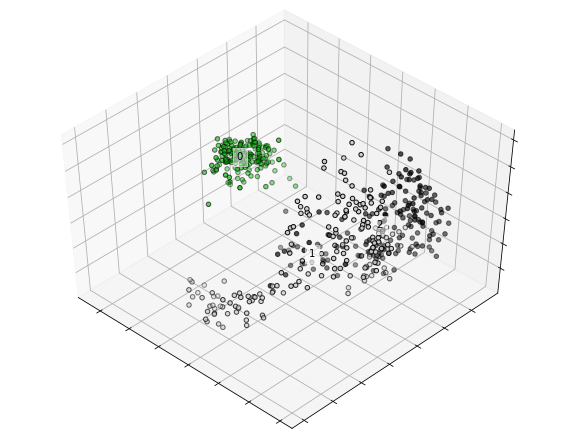

In [57]:
#視覺化
fig = plt.figure(1, figsize=(8, 6))
plt.cla()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('0',0),('1',1),('2',2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment = 'center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
y = np.choose(y, [1, 2, 0])
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.nipy_spectral,
          edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()